In [26]:
from process_images import images_in_path, process_images, prepare_for_network, prediction, visualizable, plot_tensors, image_chunking
from hopfield import LayerInfo, SparseHopfield, train, loss
from typing import List
from matplotlib import pyplot as plt

In [27]:
layers: List[LayerInfo] = [
    LayerInfo(nodes=-1, memories=16),
    LayerInfo(nodes=3, memories=32),
    LayerInfo(nodes=1, memories=10)
]

In [28]:
chunk_length = 8
chunks_per_row = 12
num_rows = 64

In [29]:
path = "data"
raw_images = images_in_path(path)

In [30]:
raw_images

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x1024>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x533>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x1024>]

In [31]:
path = "data"
images = process_images(raw_images, chunk_length, chunks_per_row, num_rows)

In [35]:
images.shape

torch.Size([7, 64, 96])

In [ ]:
prepared, fields, field_dim, height, width = prepare_for_network(images, chunks_per_row, num_rows)

In [8]:
net = SparseHopfield(fields, field_dim, layers, alpha=16.0)

In [9]:
loss(net, prepared)

(tensor(0.0833),
 [tensor(0.1070),
  tensor(0.0786),
  tensor(0.0719),
  tensor(0.1299),
  tensor(0.0487),
  tensor(0.0920),
  tensor(0.0550)])

In [10]:
train(net, prepared)

In [11]:
loss(net, prepared)

(tensor(2.4519e-12),
 [tensor(1.7504e-12),
  tensor(2.3712e-12),
  tensor(2.1383e-12),
  tensor(3.2218e-12),
  tensor(2.6700e-12),
  tensor(2.7407e-12),
  tensor(2.2710e-12)])

## Pristine Recall

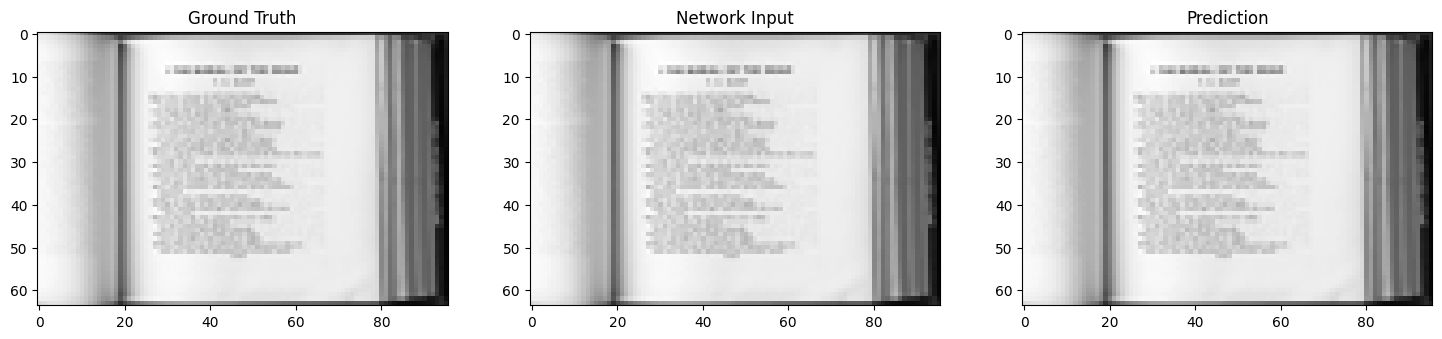

In [12]:
ground_truth = prepared[0].unsqueeze(0)
net_input = ground_truth
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [58]:
img0 = raw_images[0]
from torchvision.transforms import functional as F
img0 = F.to_tensor(img0)
from process_images import corruption_replace
img0 = corruption_replace(img0, 0.99)
img0_pil = F.to_pil_image(img0)
img0_tensors = image_chunking(img0_pil, chunk_length, chunks_per_row, num_rows)
img0_tensors
img0_tensors = img0_tensors.unsqueeze(0)
prepared0, _, _, _, _ = prepare_for_network(img0_tensors, chunks_per_row, num_rows)

## Corruption - Replacement

In [59]:
from process_images import corruption_replace

### Low Noise

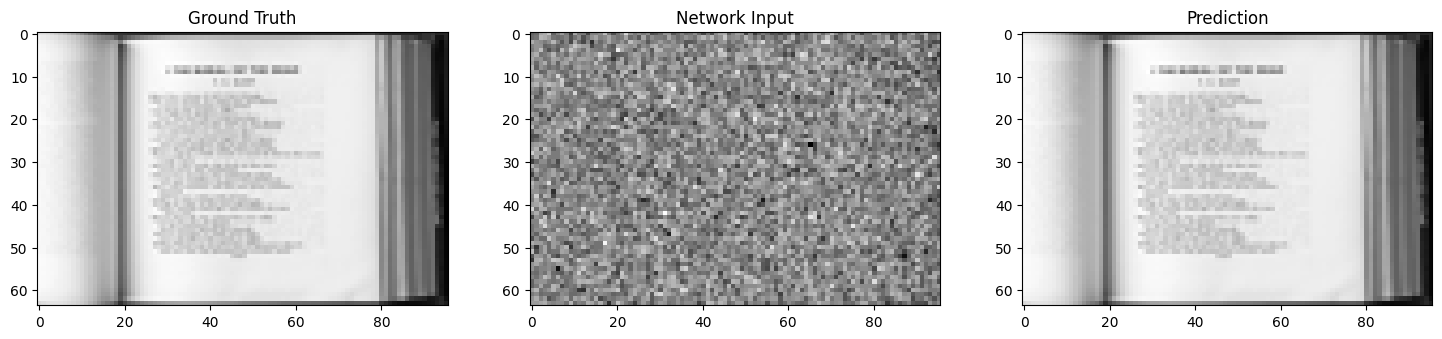

In [60]:
ground_truth = prepared[0].unsqueeze(0)
net_input = prepared0
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

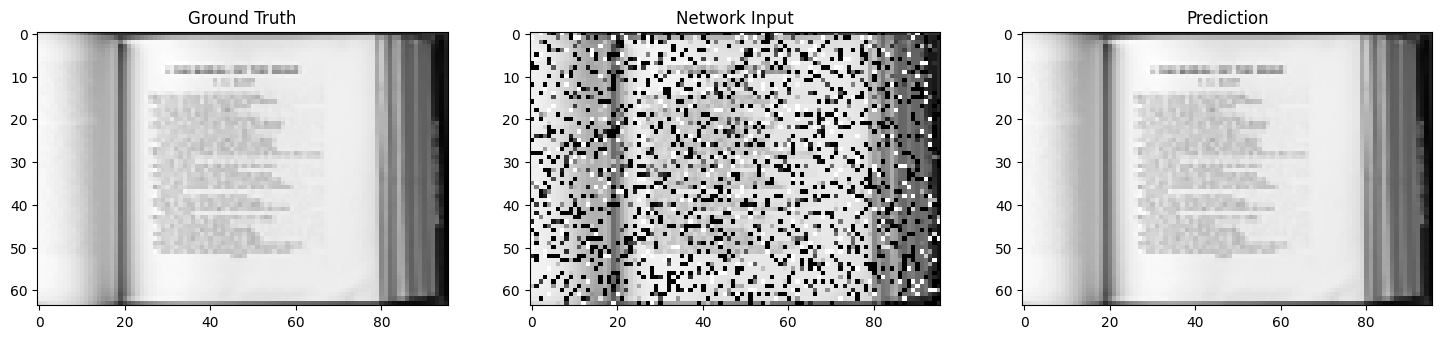

In [13]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_replace(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

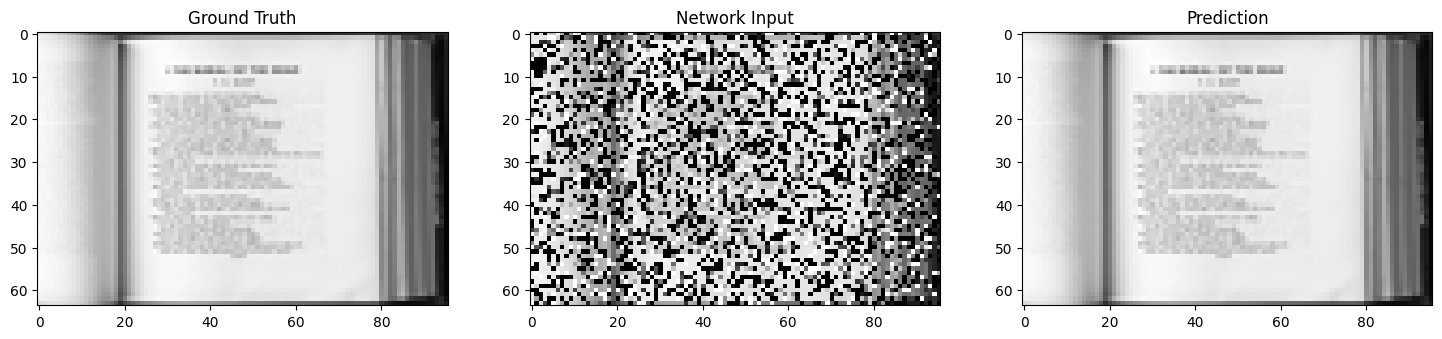

In [14]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_replace(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

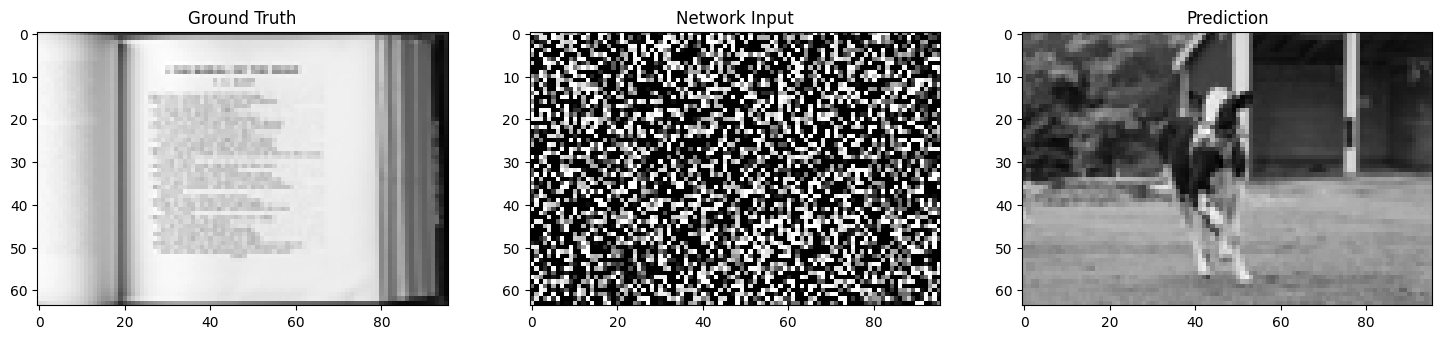

In [15]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_replace(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

## Corruption - Additive

In [16]:
from process_images import corruption_additive

### Low Noise

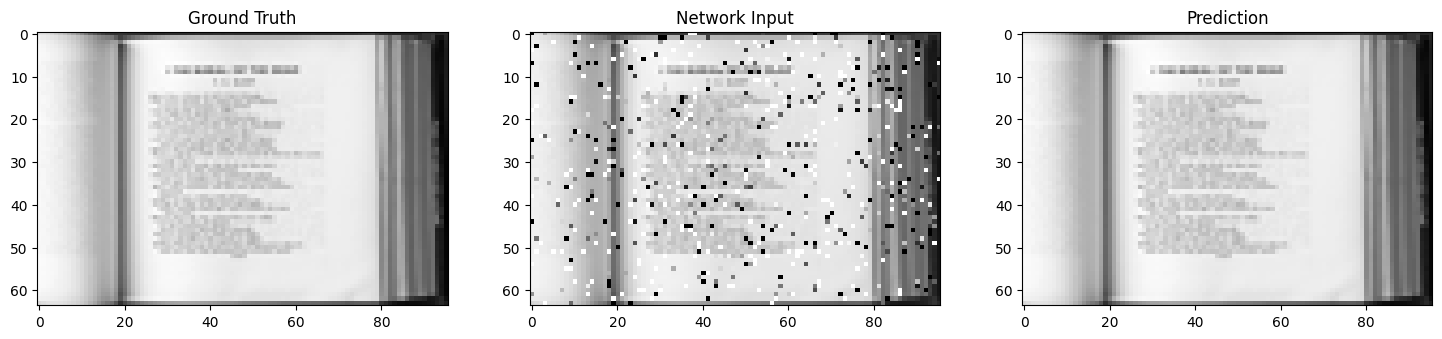

In [17]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_additive(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

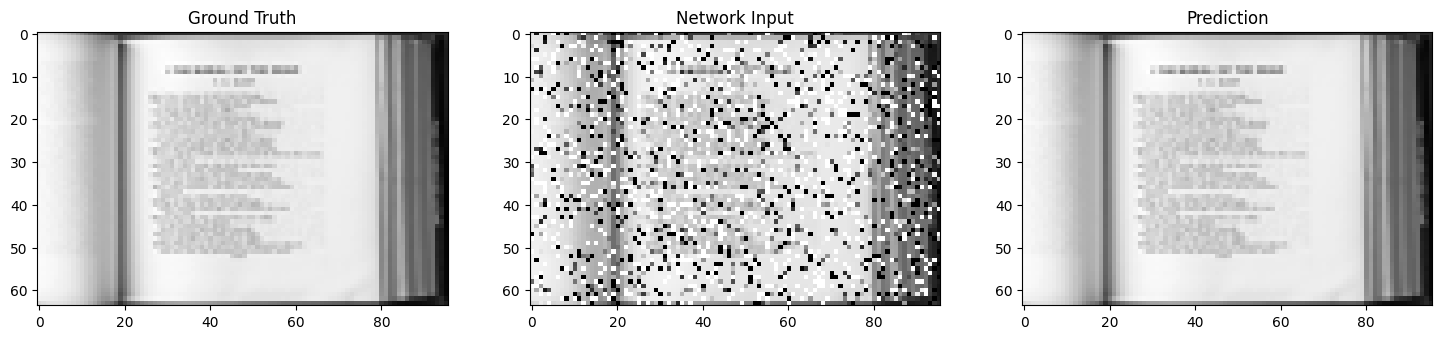

In [18]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_additive(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

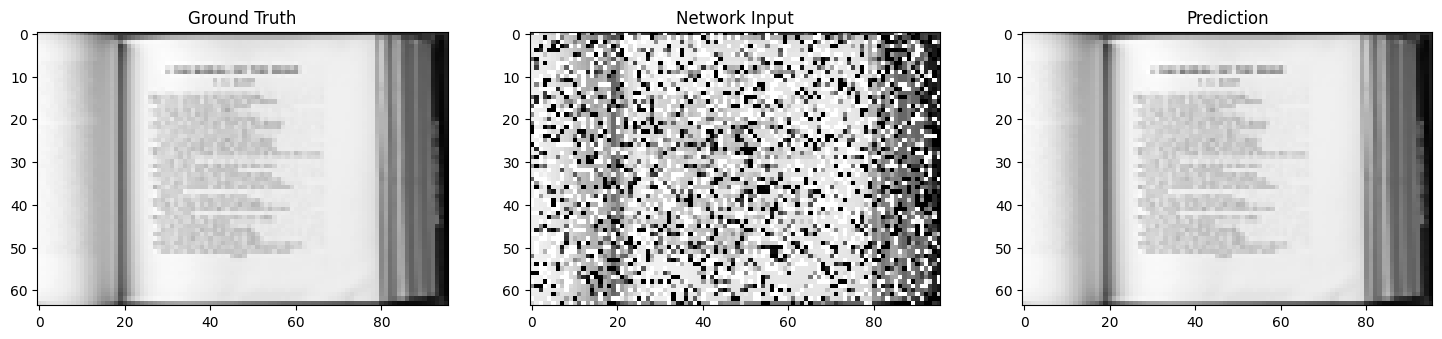

In [19]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_additive(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

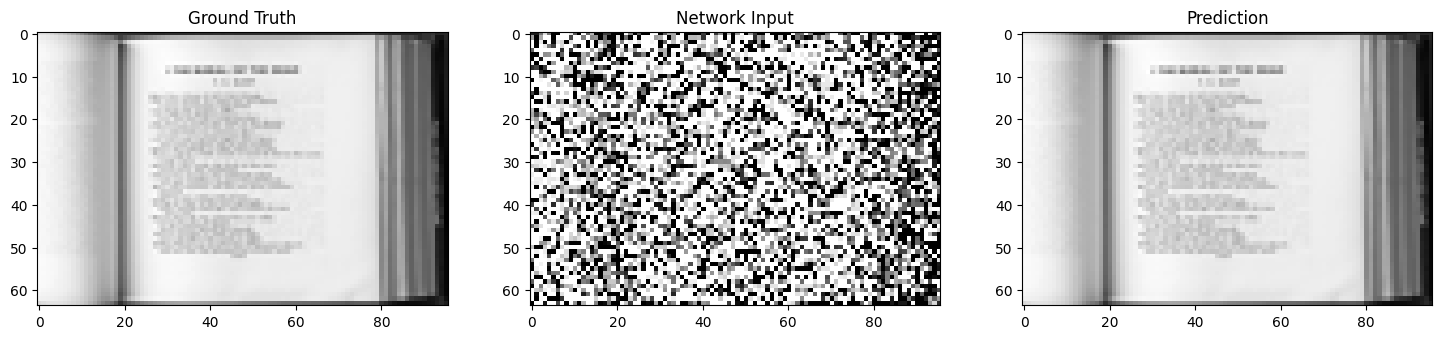

In [20]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_additive(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

## Blackouts - Revolving Lantern

In [21]:
from process_images import blackout_revolving_lantern

### Low Noise

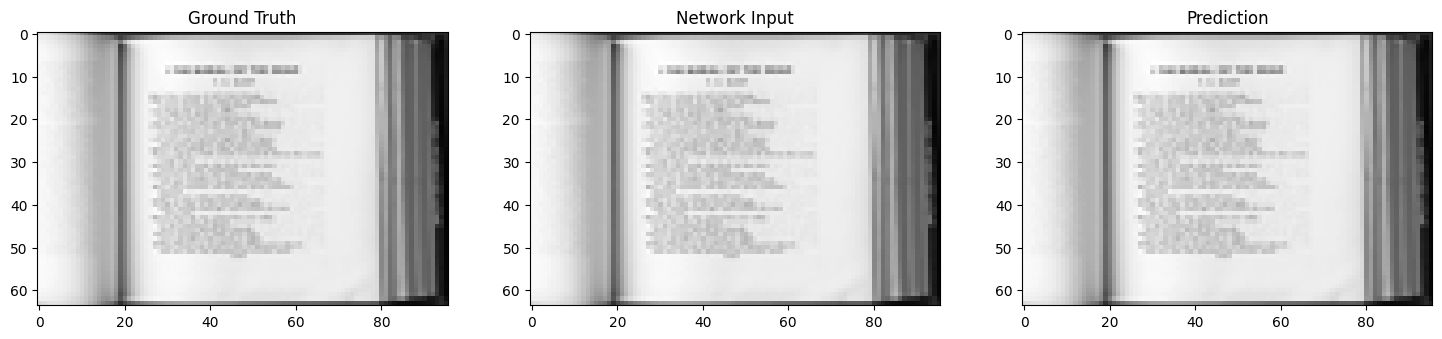

In [22]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackout_revolving_lantern(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

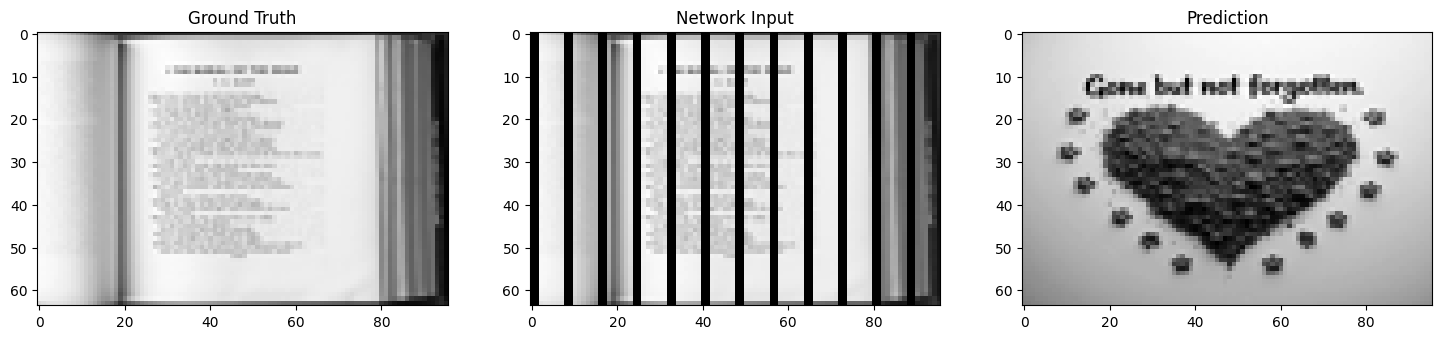

In [23]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackout_revolving_lantern(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

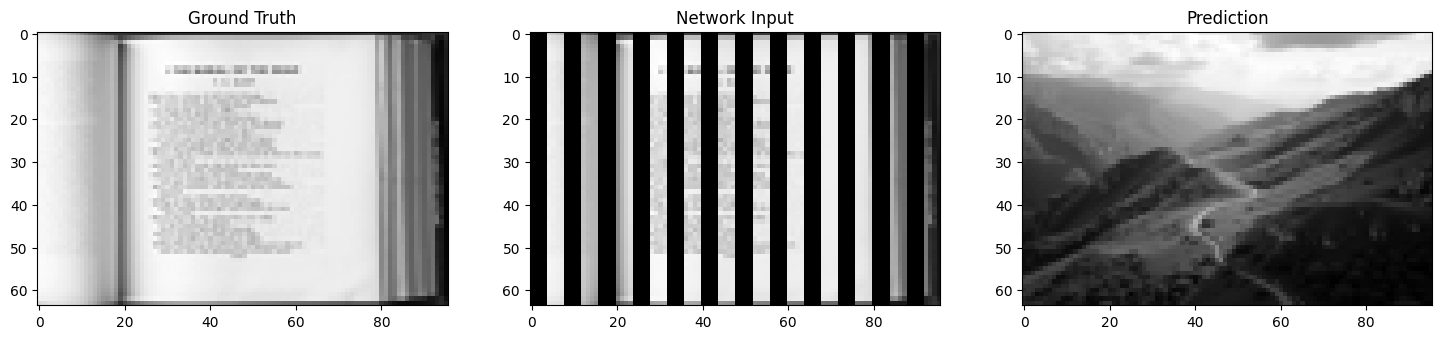

In [24]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackout_revolving_lantern(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

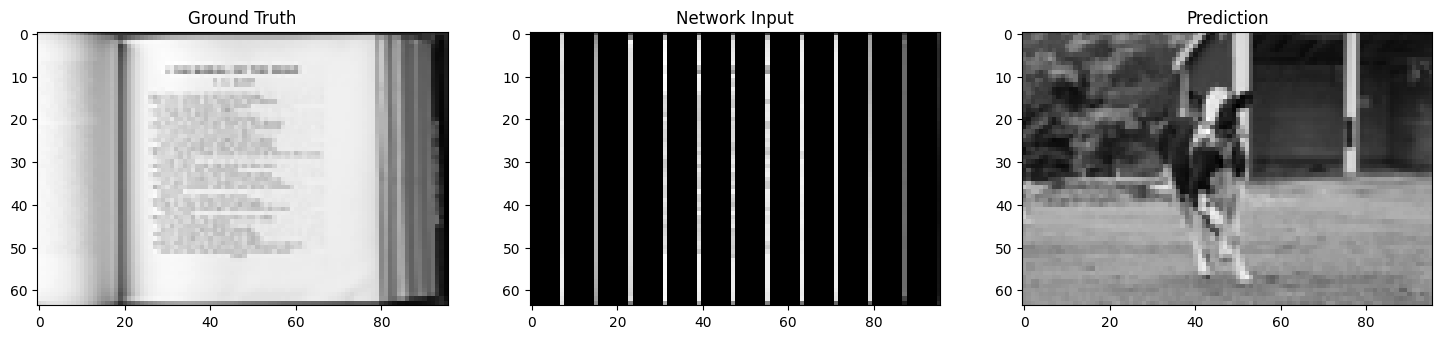

In [25]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackout_revolving_lantern(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [26]:
from process_images import corruption_revolving_lantern

### Low Noise

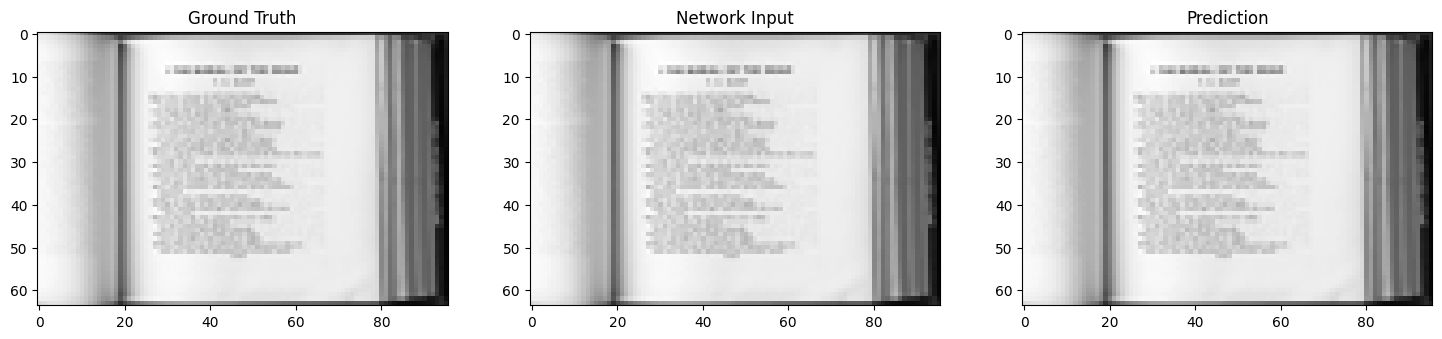

In [27]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

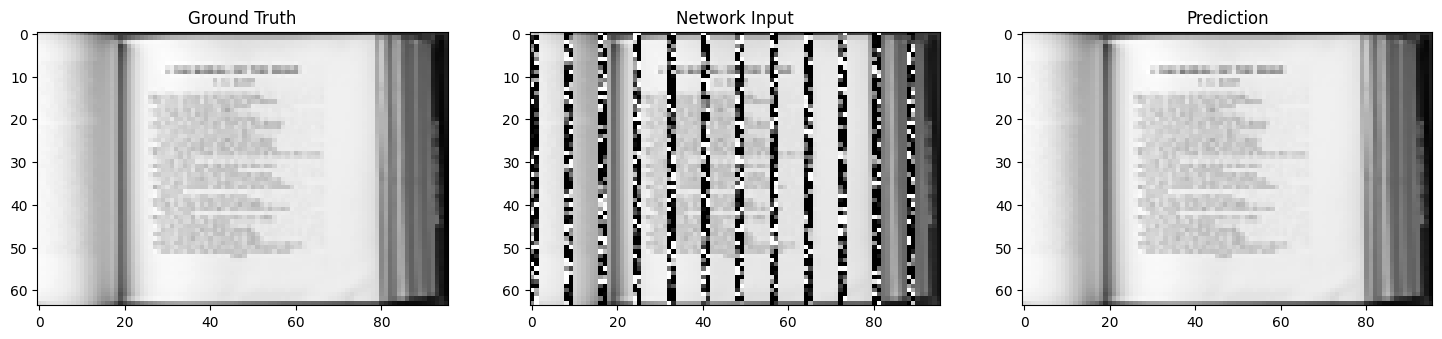

In [28]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

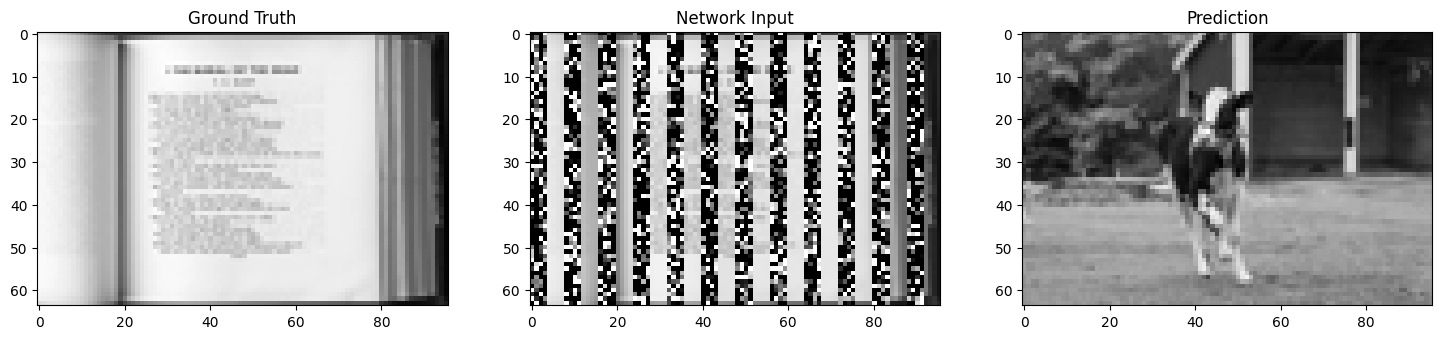

In [29]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

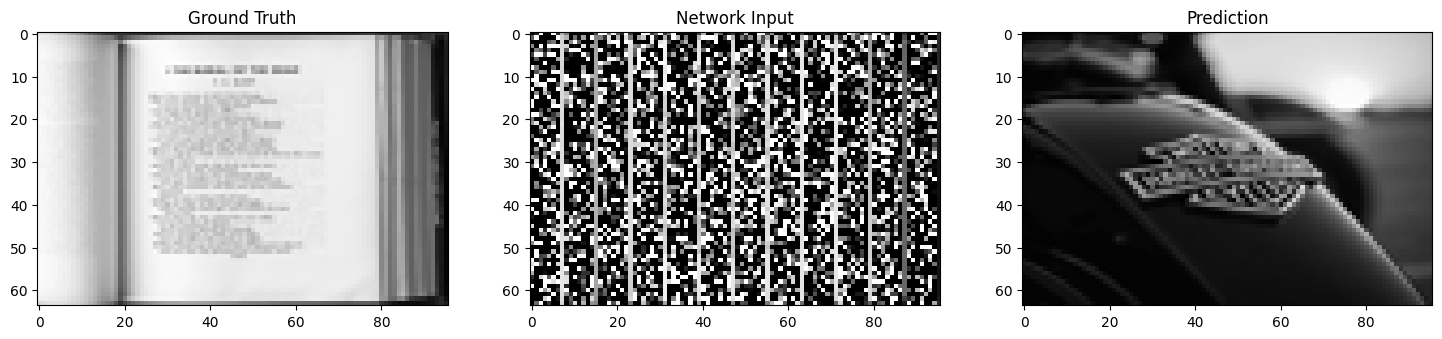

In [30]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [31]:
from process_images import blackouts

### Low Noise

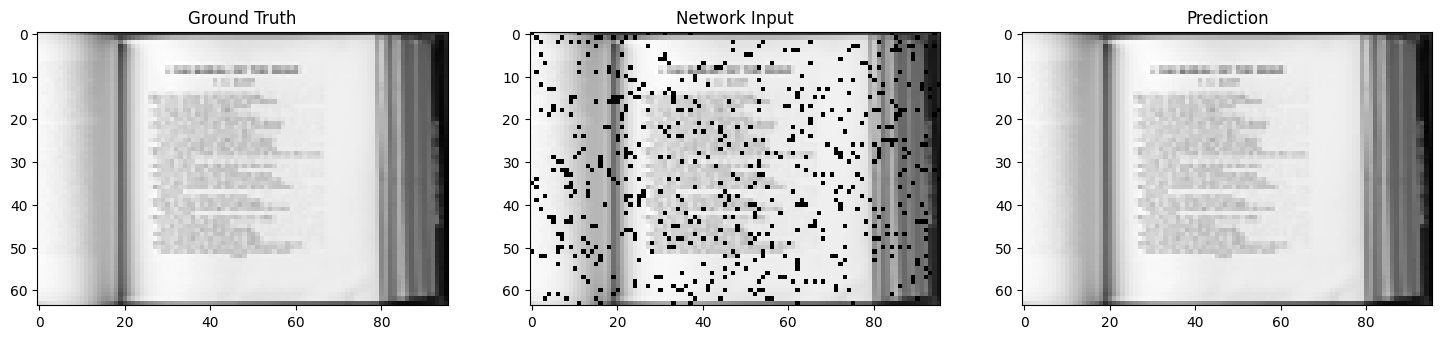

In [32]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackouts(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

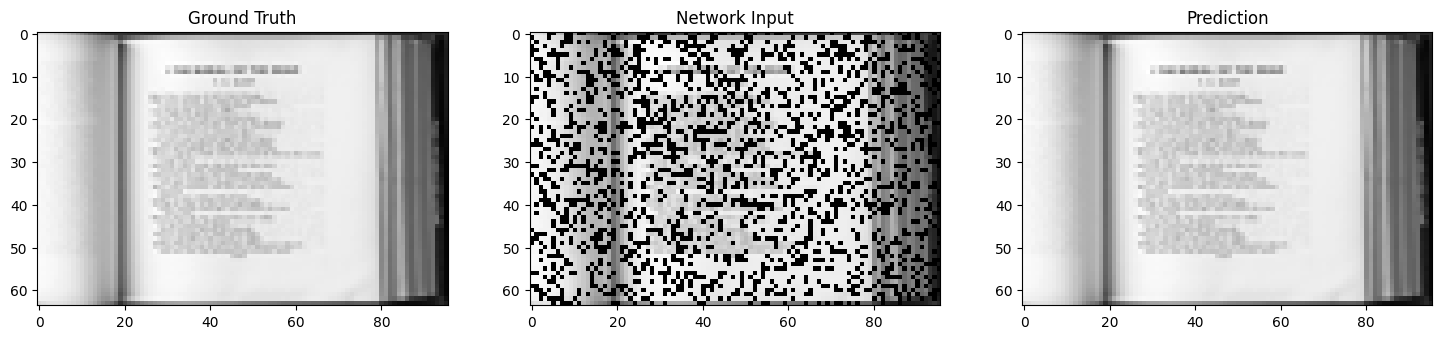

In [33]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackouts(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

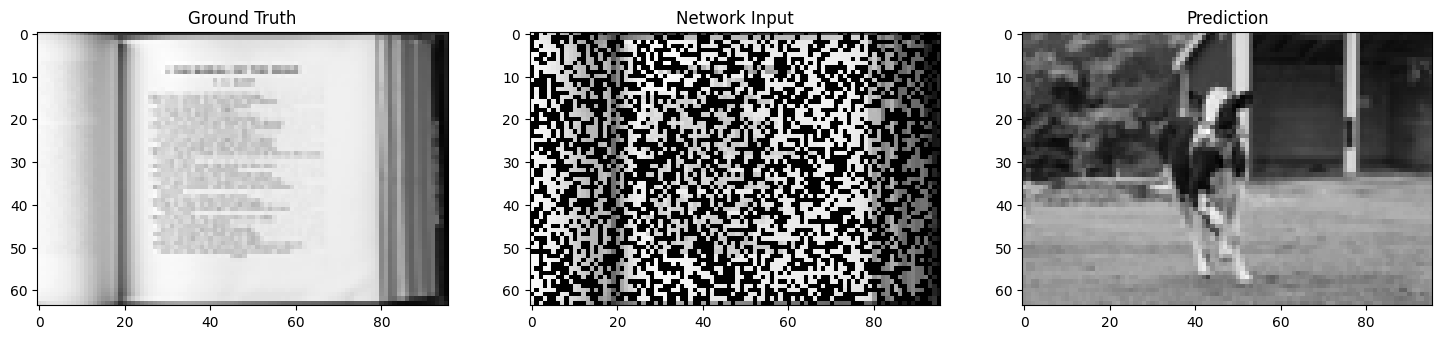

In [34]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackouts(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

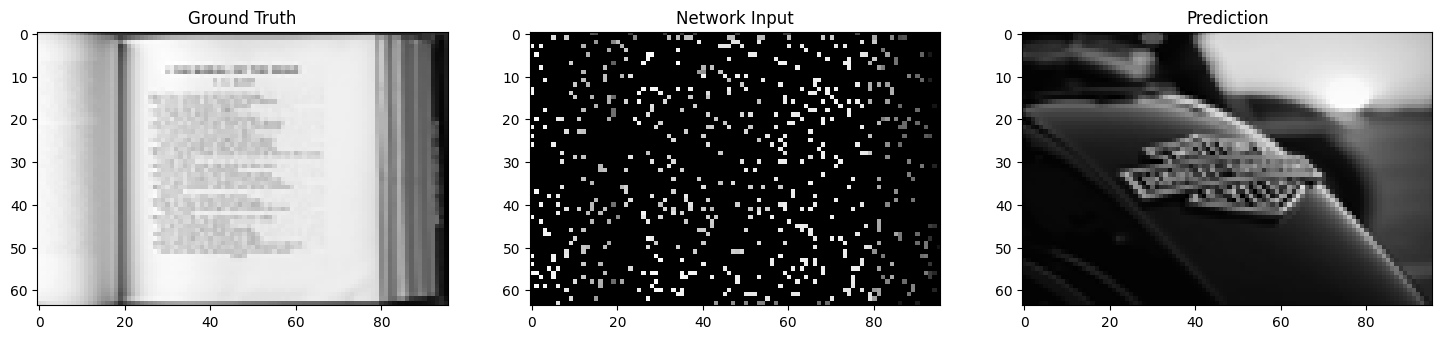

In [35]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackouts(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [36]:
from process_images import corruption_revolving_lantern

### Low Noise

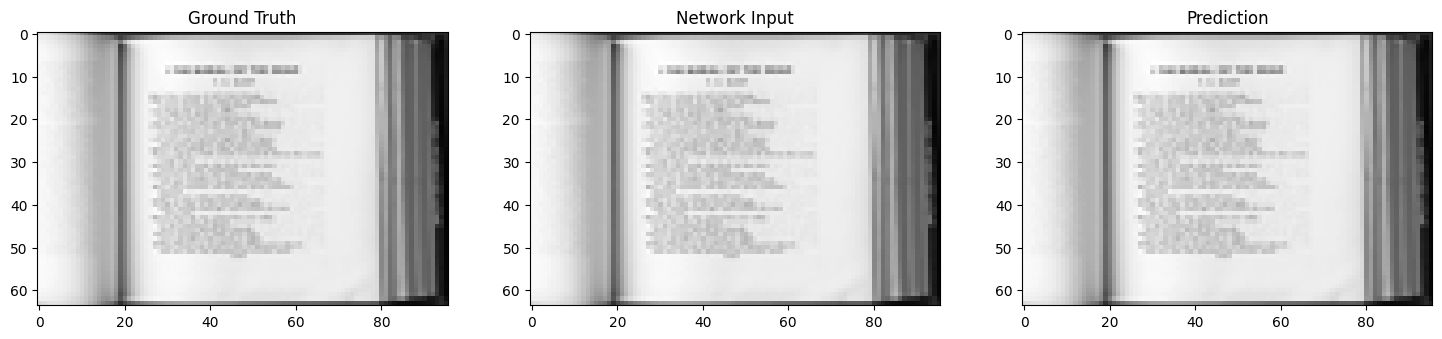

In [37]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

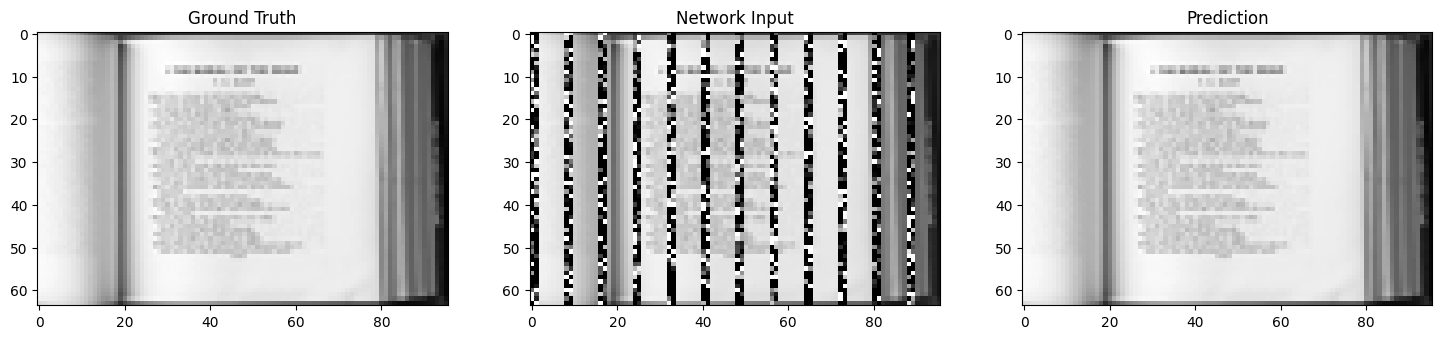

In [38]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

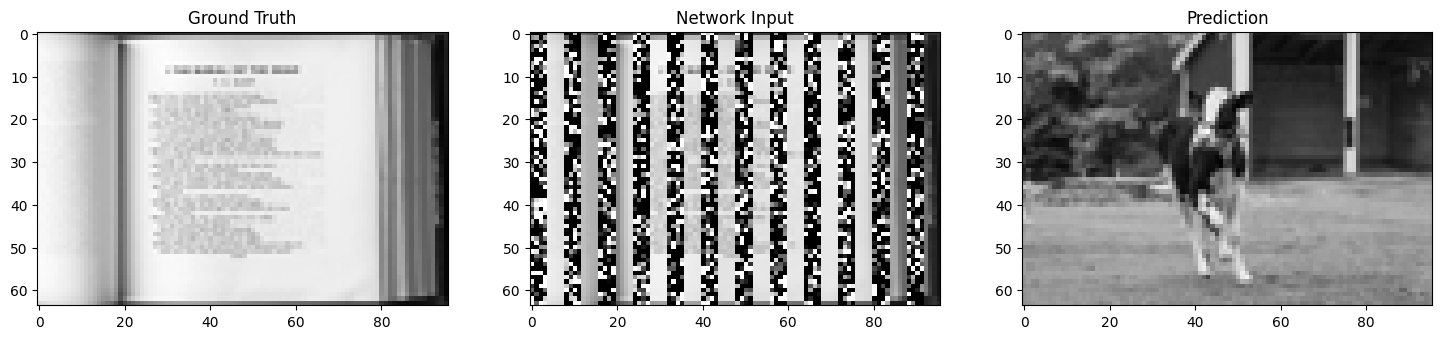

In [39]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

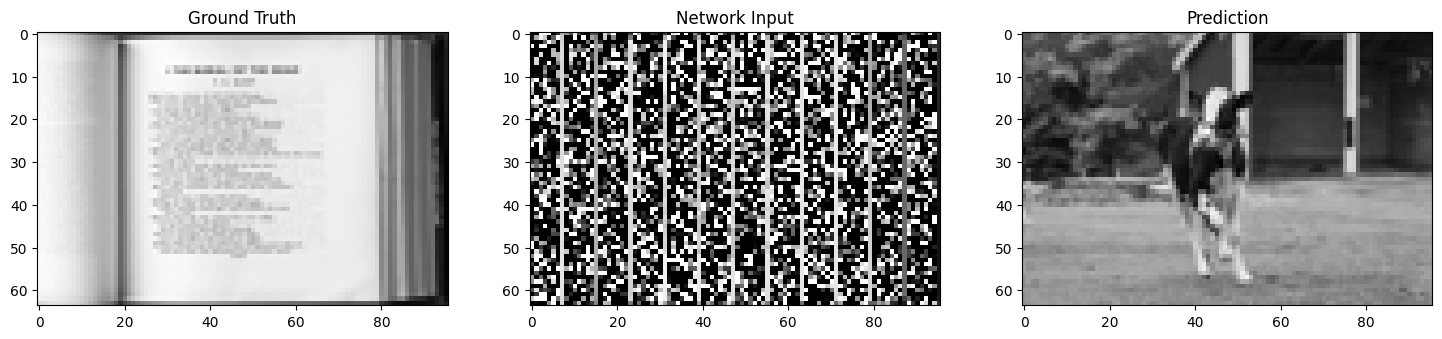

In [40]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [41]:
from process_images import blackout_half

### Blackout - Left Half

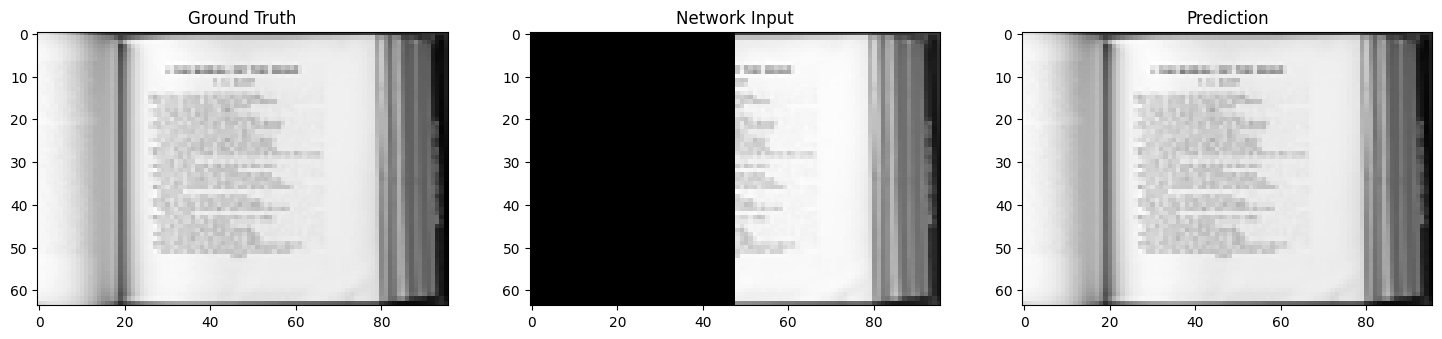

In [42]:
ground_truth = prepared[0].unsqueeze(0)

net_input = blackout_half(ground_truth.reshape(-1, height, width)).reshape(ground_truth.shape)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

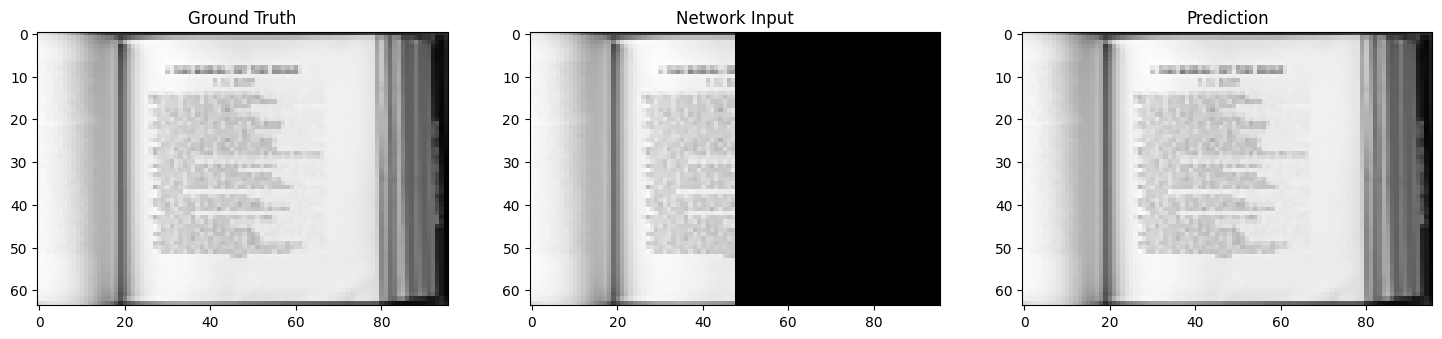

In [43]:
ground_truth = prepared[0].unsqueeze(0)

net_input = blackout_half(ground_truth.reshape(-1, height, width), right=True).reshape(ground_truth.shape)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)